  # PostProcessing
  This notebook is initially designed for PostProcessing ASETS-II numerical and experimental data.
  It can also be used for other configurations's numerical results. But if you want to compare with other experimental data with a different format than ASETS-II. You should find a way to read them to RTD and RTDt in this notebook.

In [1]:
using ComputationalHeatTransfer
using Plots
using Interact
using Statistics

WebIO._IJuliaInit()

In [2]:
function get_wet_vapor_ratio(SimuResult::SimulationResult)
    t = SimuResult.tube_hist_t;
    tube_sys = getcurrentsys!.(SimuResult.tube_hist_u,[SimuResult.integrator_tube.p]);
    filmLend = [x.vapor.Lfilm_end for x in tube_sys]
    filmLstart = [x.vapor.Lfilm_start for x in tube_sys]
    filmLtotal = sum.(filmLend) .+ sum.(filmLstart)

    Xps = [x.liquid.Xp for x in tube_sys]
    Lvaporplug=XptoLvaporplug.(Xps,[tube_sys[1].tube.L],[tube_sys[1].tube.closedornot]);
    vaporLtotal = sum.(Lvaporplug)
    
   
    starti = floor(Int64,length(t)/2)
    ratio = mean((filmLtotal./vaporLtotal)[starti:end])
end

get_wet_vapor_ratio (generic function with 1 method)

In [3]:
function get_avgδ(SimuResult::SimulationResult)
    t = SimuResult.tube_hist_t;
    tube_sys = getcurrentsys!.(SimuResult.tube_hist_u,[SimuResult.integrator_tube.p]);
    
    filmLδend = [x.vapor.Lfilm_end.*x.vapor.δend for x in tube_sys]
    filmLδstart = [x.vapor.Lfilm_start.*x.vapor.δstart for x in tube_sys]
#     filmδend = [x.vapor.δend for x in tube_sys]
#     filmδstart = [x.vapor.δstart for x in tube_sys]
    filmLend = [x.vapor.Lfilm_end for x in tube_sys]
    filmLstart = [x.vapor.Lfilm_start for x in tube_sys]
    filmLtotal = sum.(filmLend) .+ sum.(filmLstart)
    avgδ = sum.(filmLδend) .+ sum.(filmLδstart) ./ filmLtotal
    
    starti = floor(Int64,length(t)/2)
    mean(avgδ[starti:end])
end

get_avgδ (generic function with 1 method)

In [4]:
function get_conductance(SimuResult::SimulationResult)
    tube_sys = getcurrentsys!.(SimuResult.tube_hist_u,[SimuResult.integrator_tube.p]);
    power = tube_sys[1].wall.power
    
    x2Dsensors = [-2.75,-1.4,-0.8,0.0,0.0,0.8,1.4,2.75] .* inches
    y2Dsensors = [0.0,   0.0, 0.0,0.0,0.4,0.0,0.0,0.0] .* inches
    plate_sensors = (x2Dsensors,y2Dsensors);
    
    t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
    ihot = 4 # hot sensor  for calculating thermal conductance
    icold = 8 # cold sensor  for calculating thermal conductance;
    
    starti = floor(Int64,length(t_hist)/2)
    mean(power./(g_hist[starti:end,ihot] .- g_hist[starti:end,icold]))
end

get_conductance (generic function with 1 method)

In [5]:
cd("/Users/yuxuanli/Documents/Hoffman/workdir/numedata")

  # Read simulation data

In [6]:
# read_path = "../numedata/solution.jld2"
read_path = "../numedata/ASETS-000-000-13.jld2"
# read_path = "../numedata/ASETS-015-000-13.jld2"

SimuResult = load(read_path)["SimulationResult"];

  ### get time array

In [7]:
t = SimuResult.tube_hist_t;

  # Plot 2D graphs

In [8]:
η_plus_array = 0:0.2:1
η_minus_array = 0:0.2:1
wet_ratio_matrix = zeros(size(η_plus_array,1),size(η_minus_array,1))
cond_matrix = zeros(size(η_plus_array,1),size(η_minus_array,1))
avgδ_matrix = zeros(size(η_plus_array,1),size(η_minus_array,1))

6×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [9]:
for i in eachindex(η_plus_array)
    for j in eachindex(η_minus_array)
        η_plus=η_plus_array[i]
        η_minus=η_minus_array[j]
        plus_string = (Int64(100*η_plus) == 100 ? "" : "0")*string(Int64(100*η_plus))*(Int64(100*η_plus) == 0 ? "0" : "")
        minus_string = (Int64(100*η_minus) == 100 ? "" : "0")*string(Int64(100*η_minus))*(Int64(100*η_minus) == 0 ? "0" : "")
        read_path = "../numedata/ASETS-"*plus_string*"-"*minus_string*"-13.jld2"
        SimuResult = load(read_path)["SimulationResult"];
        println(read_path)
        wet_ratio_matrix[j,i] = get_wet_vapor_ratio(SimuResult)
        cond_matrix[j,i] = get_conductance(SimuResult)
        avgδ_matrix[j,i] = get_avgδ(SimuResult)
    end
end

../numedata/ASETS-000-000-13.jld2
../numedata/ASETS-000-020-13.jld2
../numedata/ASETS-000-040-13.jld2
../numedata/ASETS-000-060-13.jld2
../numedata/ASETS-000-080-13.jld2
../numedata/ASETS-000-100-13.jld2
../numedata/ASETS-020-000-13.jld2
../numedata/ASETS-020-020-13.jld2
../numedata/ASETS-020-040-13.jld2
../numedata/ASETS-020-060-13.jld2
../numedata/ASETS-020-080-13.jld2
../numedata/ASETS-020-100-13.jld2
../numedata/ASETS-040-000-13.jld2
../numedata/ASETS-040-020-13.jld2
../numedata/ASETS-040-040-13.jld2
../numedata/ASETS-040-060-13.jld2
../numedata/ASETS-040-080-13.jld2
../numedata/ASETS-040-100-13.jld2
../numedata/ASETS-060-000-13.jld2
../numedata/ASETS-060-020-13.jld2
../numedata/ASETS-060-040-13.jld2
../numedata/ASETS-060-060-13.jld2
../numedata/ASETS-060-080-13.jld2
../numedata/ASETS-060-100-13.jld2
../numedata/ASETS-080-000-13.jld2
../numedata/ASETS-080-020-13.jld2
../numedata/ASETS-080-040-13.jld2
../numedata/ASETS-080-060-13.jld2
../numedata/ASETS-080-080-13.jld2
../numedata/AS

In [28]:
contourf(η_minus_array,η_plus_array,wet_ratio_matrix,xlabel="η+",ylabel="η-",title="wet vapor ratio")
scatter!(xgrid[:],ygrid[:],legend=false,color=:green)
savefig("wetvapor.pdf")

"/Users/yuxuanli/Documents/Hoffman/workdir/numedata/wetvapor.pdf"

In [29]:
contourf(η_minus_array,η_plus_array,cond_matrix,xlabel="η+",ylabel="η-",title="thermal conductance",clim=(5,11))
contour!(η_minus_array,η_plus_array,cond_matrix,levels=[6.8],linewidth=2,linecolor=:green)
scatter!(xgrid[:],ygrid[:],legend=false,color=:green)
savefig("condmany.pdf")

"/Users/yuxuanli/Documents/Hoffman/workdir/numedata/condmany.pdf"

In [12]:
contourf(η_minus_array,η_plus_array,avgδ_matrix,xlabel="η+",ylabel="η-",right_margin = 10Plots.mm,title="average film thickness")
scatter!(xgrid[:],ygrid[:],legend=false,color=:green)

LoadError: UndefVarError: xgrid not defined

In [13]:
avgδ_matrix

6×6 Matrix{Float64}:
 2.78601e-5  3.01482e-5  3.08728e-5  3.06639e-5  2.95136e-5  3.12597e-5
 2.81526e-5  2.82229e-5  2.94924e-5  3.13114e-5  3.16947e-5  3.13815e-5
 2.82125e-5  2.86535e-5  2.97677e-5  2.92708e-5  3.26653e-5  3.10116e-5
 2.91792e-5  2.95608e-5  2.71198e-5  2.8002e-5   3.01018e-5  2.94235e-5
 2.71879e-5  2.8363e-5   2.86941e-5  2.99153e-5  2.69866e-5  3.03957e-5
 2.76273e-5  2.79087e-5  2.79285e-5  2.73885e-5  2.73129e-5  2.66253e-5

In [14]:
wet_ratio_matrix

6×6 Matrix{Float64}:
 0.942335  0.859834  0.773972  0.754938  0.536308  0.636804
 0.976861  0.949857  0.872377  0.809894  0.755783  0.702674
 0.974672  0.976696  0.94764   0.898953  0.812078  0.752297
 0.979761  0.978302  0.971418  0.943023  0.915587  0.863058
 0.977857  0.981194  0.974911  0.969167  0.942326  0.893205
 0.980098  0.980225  0.976816  0.972942  0.973618  0.926559

In [15]:
xgrid = η_plus_array' .* ones(length(η_minus_array))

6×6 Matrix{Float64}:
 0.0  0.2  0.4  0.6  0.8  1.0
 0.0  0.2  0.4  0.6  0.8  1.0
 0.0  0.2  0.4  0.6  0.8  1.0
 0.0  0.2  0.4  0.6  0.8  1.0
 0.0  0.2  0.4  0.6  0.8  1.0
 0.0  0.2  0.4  0.6  0.8  1.0

In [16]:
ygrid = ones(length(η_plus_array))' .* η_minus_array

6×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.2  0.2  0.2  0.2  0.2  0.2
 0.4  0.4  0.4  0.4  0.4  0.4
 0.6  0.6  0.6  0.6  0.6  0.6
 0.8  0.8  0.8  0.8  0.8  0.8
 1.0  1.0  1.0  1.0  1.0  1.0

In [17]:
xgrid[:]

36-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.4
 ⋮
 0.8
 0.8
 0.8
 0.8
 0.8
 0.8
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [18]:
wet_ratio_matrix[:]

36-element Vector{Float64}:
 0.9423353921638917
 0.9768612254076835
 0.9746724446046338
 0.9797612301623179
 0.9778570686107032
 0.9800980023961237
 0.8598342289119987
 0.9498571242366235
 0.9766960289596541
 0.978302008283491
 0.9811937051300066
 0.9802248556164107
 0.7739716587668338
 ⋮
 0.5363084630001631
 0.7557827884261297
 0.8120781333656628
 0.9155870768923225
 0.9423261554571305
 0.9736182651554648
 0.6368037204219302
 0.7026744429692708
 0.7522967832957708
 0.8630576936609832
 0.8932053299694707
 0.9265587701192318

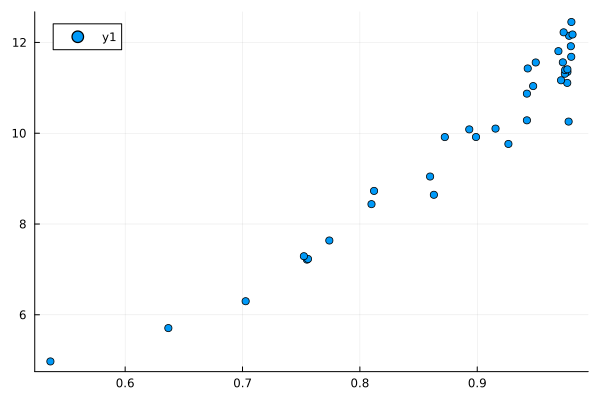

In [19]:
scatter(wet_ratio_matrix[:],cond_matrix[:])

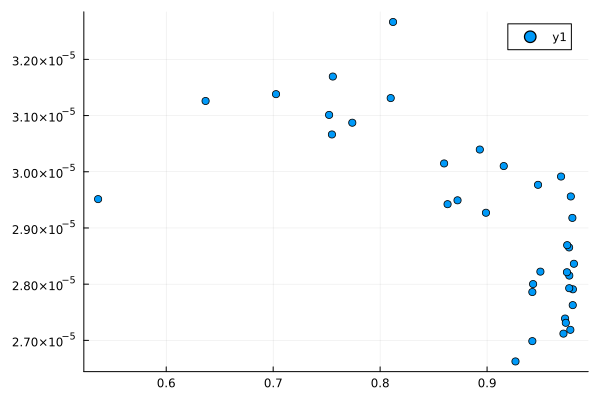

In [20]:
scatter(wet_ratio_matrix[:],avgδ_matrix[:])

In [21]:
import XLSX

In [22]:
expfile = expfileDict["O002_H001_P040"]
exppath = "../expdata/"
xf = XLSX.readxlsx(exppath*expfile);
Onum, Hnum, power_exp = getconfig(expfile)
RTDt,RTD = getRTD(xf,Onum);
RTD_for_plotting = [1,4,8];

In [23]:
plot(OHPTcurve(),RTD_for_plotting,(t_hist,g_hist),SimuResult)
plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

LoadError: UndefVarError: t_hist not defined